In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('lead_scoring_cleaned.csv')
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Other,Other,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Other,Other,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Other,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Other,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [6]:
# # To fill null values in TotalVisits and Page Views Per Visit

# # Step 1: Calculate the mean for converted leads
# mean_total_visits_converted = df[df['Converted'] == 1]['TotalVisits'].mean()
# mean_page_views_converted = df[df['Converted'] == 1]['Page Views Per Visit'].mean()

# # Step 2: Calculate the mean for not converted leads
# mean_total_visits_not_converted = df[df['Converted'] == 0]['TotalVisits'].mean()
# mean_page_views_not_converted = df[df['Converted'] == 0]['Page Views Per Visit'].mean()

# # Step 3: Fill null values in TotalVisits and Page Views Per Visit
# df.loc[(df['Converted'] == 1) & (df['TotalVisits'].isnull()), 'TotalVisits'] = mean_total_visits_converted
# df.loc[(df['Converted'] == 1) & (df['Page Views Per Visit'].isnull()), 'Page Views Per Visit'] = mean_page_views_converted

# df.loc[(df['Converted'] == 0) & (df['TotalVisits'].isnull()), 'TotalVisits'] = mean_total_visits_not_converted
# df.loc[(df['Converted'] == 0) & (df['Page Views Per Visit'].isnull()), 'Page Views Per Visit'] = mean_page_views_not_converted

# # Optional: Check if there are any remaining null values
# print("Remaining null values in TotalVisits:", df['TotalVisits'].isnull().sum())
# print("Remaining null values in Page Views Per Visit:", df['Page Views Per Visit'].isnull().sum())

  Time Spent  Leads  Converted  Not Converted  Conversion Ratio
3  1501-2000    575        411            164             71.48
2  1001-1500   1528       1053            475             68.91
4      2000+     22         15              7             68.18
1   501-1000   1042        599            443             57.49
0      0-500   6073       1483           4590             24.42


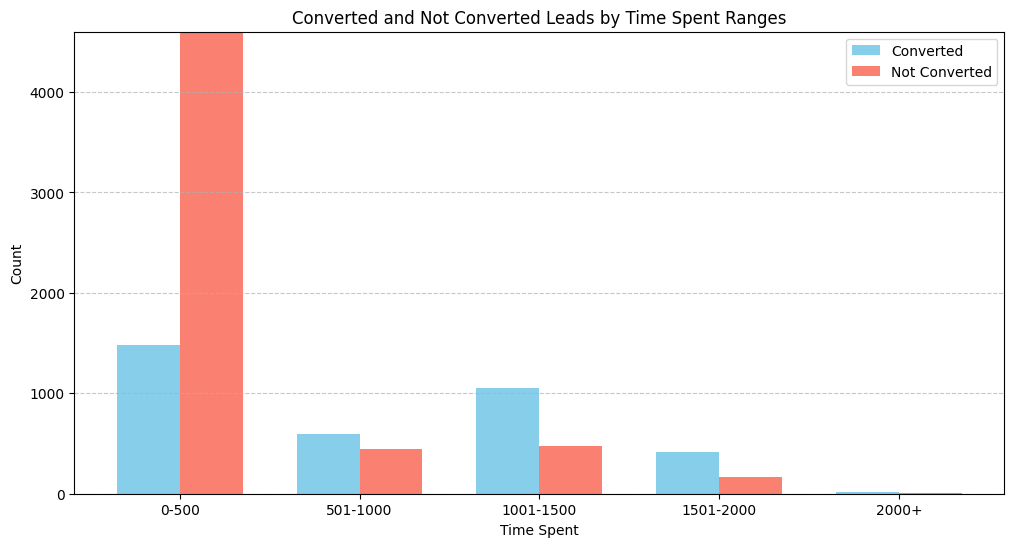

In [7]:
# Hypothesis: If a non-paying customer has spent time on website greater than 1000 then he can be converted to paying customer

bins = [0, 501, 1001, 1501, 2001, float('inf')]  # Define the ranges
labels = ['0-500', '501-1000', '1001-1500', '1501-2000', '2000+']  # Labels for the ranges

# Create a new column for visit ranges
df['Time Spent'] = pd.cut(df['Total Time Spent on Website'], bins=bins, labels=labels, right=False)

# print(df['Visit Range'])

# Step 6: Initialize a dictionary to hold the summary data
summary_data = {}

# Calculate the summary for each visit range
for val in labels:  # Iterate over the defined labels to ensure all ranges are included
    converted_sum = df[df['Time Spent'] == val]['Converted'].sum()  # Sum of converted leads
    total_leads = df[df['Time Spent'] == val]['Converted'].count()  # Total leads in the range
    not_converted = total_leads - converted_sum  # Calculate not converted leads
    conversion_ratio = round(converted_sum / total_leads * 100, 2) if total_leads > 0 else 0  # Conversion ratio
    summary_data[val] = [total_leads, converted_sum, not_converted, conversion_ratio]  # Store in dictionary

# Create a DataFrame from the summary data
summary_df = pd.DataFrame.from_dict(summary_data, orient='index', 
                                     columns=['Leads', 'Converted', 'Not Converted', 'Conversion Ratio'])

# Reset index for plotting
summary_df.reset_index(inplace=True)
summary_df.rename(columns={'index': 'Time Spent'}, inplace=True)

# Sort the DataFrame by Conversion Ratio in descending order
summary_df_sorted = summary_df.sort_values(by='Conversion Ratio', ascending=False)

# Print the summary DataFrame to check the counts
print(summary_df_sorted)

# Plotting the grouped bar chart
plt.figure(figsize=(12, 6))  # Set the figure size
bar_width = 0.35  # Width of the bars
x = range(len(summary_df))  # X locations for the groups

# Create bars for converted and not converted
plt.bar(x, summary_df['Converted'], width=bar_width, label='Converted', color='skyblue')  # Converted leads
plt.bar([p + bar_width for p in x], summary_df['Not Converted'], width=bar_width, label='Not Converted', color='salmon')  # Not converted leads

# Adding labels and title
plt.title('Converted and Not Converted Leads by Time Spent Ranges')  # Title of the plot
plt.xlabel('Time Spent')  # X-axis label
plt.ylabel('Count')  # Y-axis label
plt.xticks([p + bar_width / 2 for p in x], summary_df['Time Spent'])  # Center the x-ticks
plt.legend()  # Show legend
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add grid lines
plt.ylim(0, summary_df[['Converted', 'Not Converted']].max().max() + 10)  # Set y-axis limit for better visibility
plt.show()  # Display the plot

In [8]:
converted = df[df['Converted'] == 1]
not_converted = df[df['Converted']==0]
print('Total Visits')
print('Converted - Mean : ',converted['TotalVisits'].mean())
print('Not converted - Mean : ' ,not_converted['TotalVisits'].mean())

print('Converted - Max: ',converted['TotalVisits'].max())
print('Not converted - Max : ' ,not_converted['TotalVisits'].max())

print('Converted - Min : ',converted['TotalVisits'].min())
print('Not converted - Min : ' ,not_converted['TotalVisits'].min())

Total Visits
Converted - Mean :  3.6283414162786074
Not converted - Mean :  3.3304232787191768
Converted - Max:  251.0
Not converted - Max :  141.0
Converted - Min :  0.0
Not converted - Min :  0.0


  Visit Range  Leads  Converted  Not Converted  Conversion Ratio
0         0-5   7610       2863           4747             37.62
1        6-10   1277        533            744             41.74
2       11-15    233        117            116             50.21
3       16-20     73         28             45             38.36
4         20+     47         20             27             42.55


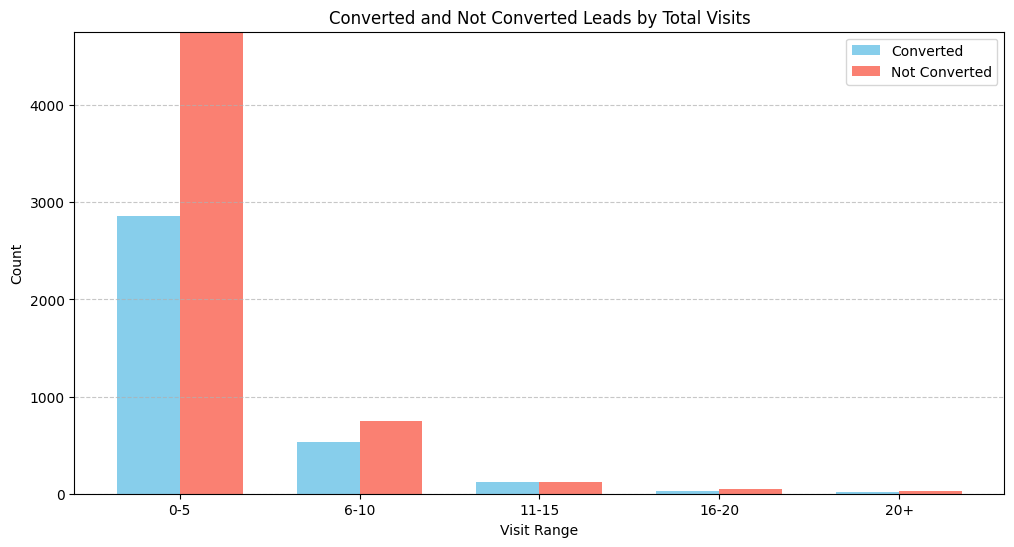

In [9]:
# Hypothesis : If a not paying customer has more visits then he can be converted to paying customer

# Define visit ranges as specified
bins = [0, 6, 11, 16, 21, float('inf')]  # Define the ranges
labels = ['0-5', '6-10', '11-15', '16-20', '20+']  # Labels for the ranges

# Create a new column for visit ranges
df['Visit Range'] = pd.cut(df['TotalVisits'], bins=bins, labels=labels, right=False)

# Initialize a dictionary to hold the summary data
summary_data = {}

# Calculate the summary for each visit range
for val in labels:  # Iterate over the defined labels to ensure all ranges are included
    converted_sum = df[df['Visit Range'] == val]['Converted'].sum()  # Sum of converted leads
    total_leads = df[df['Visit Range'] == val]['Converted'].count()  # Total leads in the range
    not_converted = total_leads - converted_sum  # Calculate not converted leads
    conversion_ratio = round(converted_sum / total_leads * 100, 2) if total_leads > 0 else 0  # Conversion ratio
    summary_data[val] = [total_leads, converted_sum, not_converted, conversion_ratio]  # Store in dictionary

# Create a DataFrame from the summary data
summary_df = pd.DataFrame.from_dict(summary_data, orient='index', 
                                     columns=['Leads', 'Converted', 'Not Converted', 'Conversion Ratio'])

# Reset index for plotting
summary_df.reset_index(inplace=True)
summary_df.rename(columns={'index': 'Visit Range'}, inplace=True)

# Sort the DataFrame by Conversion Ratio in descending order
summary_df_sorted = summary_df.sort_values(by='Conversion Ratio', ascending=False)

# Print the summary DataFrame to check the counts
print(summary_df)

# Plotting the grouped bar chart
plt.figure(figsize=(12, 6))  # Set the figure size
bar_width = 0.35  # Width of the bars
x = range(len(summary_df))  # X locations for the groups

# Create bars for converted and not converted
plt.bar(x, summary_df['Converted'], width=bar_width, label='Converted', color='skyblue')  # Converted leads
plt.bar([p + bar_width for p in x], summary_df['Not Converted'], width=bar_width, label='Not Converted', color='salmon')  # Not converted leads

# Adding labels and title
plt.title('Converted and Not Converted Leads by Total Visits')  # Title of the plot
plt.xlabel('Visit Range')  # X-axis label
plt.ylabel('Count')  # Y-axis label
plt.xticks([p + bar_width / 2 for p in x], summary_df['Visit Range'])  # Center the x-ticks
plt.legend()  # Show legend
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add grid lines
plt.ylim(0, summary_df[['Converted', 'Not Converted']].max().max() + 10)  # Set y-axis limit for better visibility
 
plt.show()  # Display the plot

In [10]:
# unique_tags = df['Tags'].unique()
# print(len(unique_tags))


tag_counts = df.groupby('Tags')['Converted'].value_counts().unstack(fill_value=0)

# Step 2: Rename the columns for clarity
tag_counts.columns = ['Not Converted', 'Converted']

# Step 3: Print the counts
print(tag_counts)

                                                   Not Converted  Converted
Tags                                                                       
Already a student                                            462          3
Busy                                                          81        105
Closed by Horizzon                                             2        356
Diploma holder (Not Eligible)                                 62          1
Graduation in progress                                       104          7
In confusion whether part time or DLP                          4          1
Interested  in full time MBA                                 114          3
Interested in Next batch                                       0          5
Interested in other courses                                  500         13
Lateral student                                                0          3
Lost to EINS                                                   4        171
Lost to Othe

In [11]:
converted[converted['Tags']=='Interested in other courses']

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity,Time Spent
407,cd34872c-0078-4b7b-809a-309bd99c6603,656126,API,Organic Search,No,No,1,4.0,1341,2.00,...,Other,Other,02.Medium,02.Medium,15.000000,15.000000,No,No,Email Opened,1001-1500
795,2b8ff598-58ef-40af-b2ee-c734f844c965,652085,Landing Page Submission,Google,No,No,1,9.0,1342,3.00,...,Other,Mumbai,02.Medium,01.High,14.000000,18.000000,No,No,Email Link Clicked,1001-1500
833,f5fff4f3-2de4-4176-967f-d8e50e25ab29,651680,API,Olark Chat,No,No,1,0.0,0,0.00,...,Other,Other,02.Medium,02.Medium,15.000000,15.000000,No,No,Modified,0-500
1089,54d8b3a3-d847-4888-9a9e-39720a56a775,648386,API,Referral Sites,No,No,1,4.0,1521,4.00,...,Other,Other,02.Medium,02.Medium,14.000000,13.000000,No,No,SMS Sent,1501-2000
1646,b8b36555-9605-465d-839a-970f30537f47,643263,API,Google,No,No,1,2.0,925,2.00,...,Other,Other,02.Medium,02.Medium,15.000000,15.000000,No,No,Modified,501-1000
4539,bb0abb6c-8f95-45df-beb3-d93b8bafb011,616143,API,Olark Chat,No,No,1,0.0,0,0.00,...,Other,Other,Other,Other,14.306252,16.344883,No,No,SMS Sent,0-500
4944,84102379-07f4-4ce3-9e9c-94cb3c029db6,612603,API,Google,No,No,1,2.0,979,2.00,...,Other Leads,Other,Other,Other,14.306252,16.344883,No,No,SMS Sent,501-1000
5021,bfb6a80e-ac5f-45df-a40f-0f76158768b1,611651,API,Google,No,No,1,2.0,1260,2.00,...,Other,Other,Other,Other,14.306252,16.344883,No,No,SMS Sent,1001-1500
5361,d6a3cb74-6302-4fb5-856b-76717e820eef,608727,API,Olark Chat,No,No,1,0.0,0,0.00,...,Other,Other,Other,Other,14.306252,16.344883,No,No,SMS Sent,0-500
5433,aa27a0af-eeab-4007-a770-fa8a93fa53c8,608251,API,Google,No,No,1,2.0,39,2.00,...,Other,Other,Other,Other,14.306252,16.344883,No,No,SMS Sent,0-500


                               Prospect ID  Lead Number  \
2     8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727   
4     3256f628-e534-4826-9d63-4a8b88782852       660681   
6     9fae7df4-169d-489b-afe4-0f3d752542ed       660673   
10    2a369e35-ca95-4ca9-9e4f-9d27175aa320       660608   
11    9bc8ce93-6144-49e0-9f9d-080fc980f83c       660570   
...                                    ...          ...   
9233  3f715465-2546-47cd-afa8-8b8dc63b8b43       579622   
9234  c0b25922-511f-4c56-852e-ced210a45447       579615   
9235  19d6451e-fcd6-407c-b83b-48e1af805ea9       579564   
9238  5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9       579538   
9239  571b5c8e-a5b2-4d57-8574-f2ffb06fdeff       579533   

                  Lead Origin     Lead Source Do Not Email Do Not Call  \
2     Landing Page Submission  Direct Traffic           No          No   
4     Landing Page Submission          Google           No          No   
6     Landing Page Submission          Google           No          N

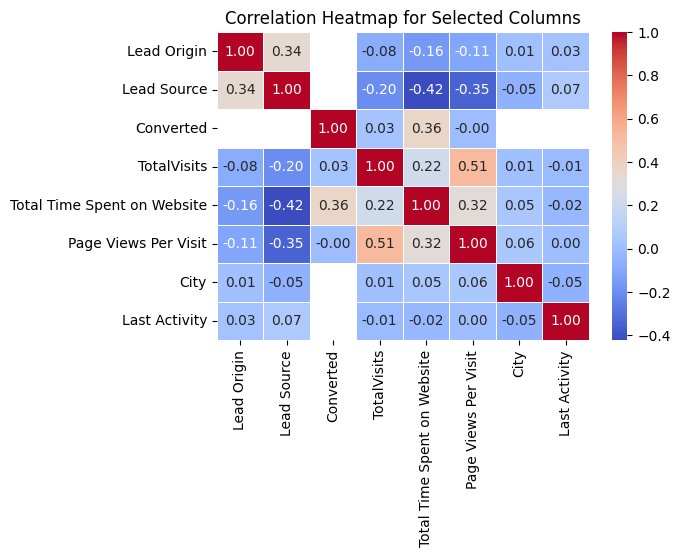

In [21]:
columns = ['Lead Origin','Lead Source','Converted','TotalVisits','Total Time Spent on Website','Page Views Per Visit','City','Last Activity']
converted_encoded = df.copy()
print(converted)
for col in ['Lead Origin', 'Lead Source', 'City','Last Activity']:  # Categorical columns
    converted_encoded[col] = converted[col].astype('category').cat.codes  # Label Encoding

print(converted_encoded)
# Compute correlation
correlation = converted_encoded[columns].corr()

plt.figure(figsize=(6,4))  # Adjust figure size
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap for Selected Columns")
plt.show()

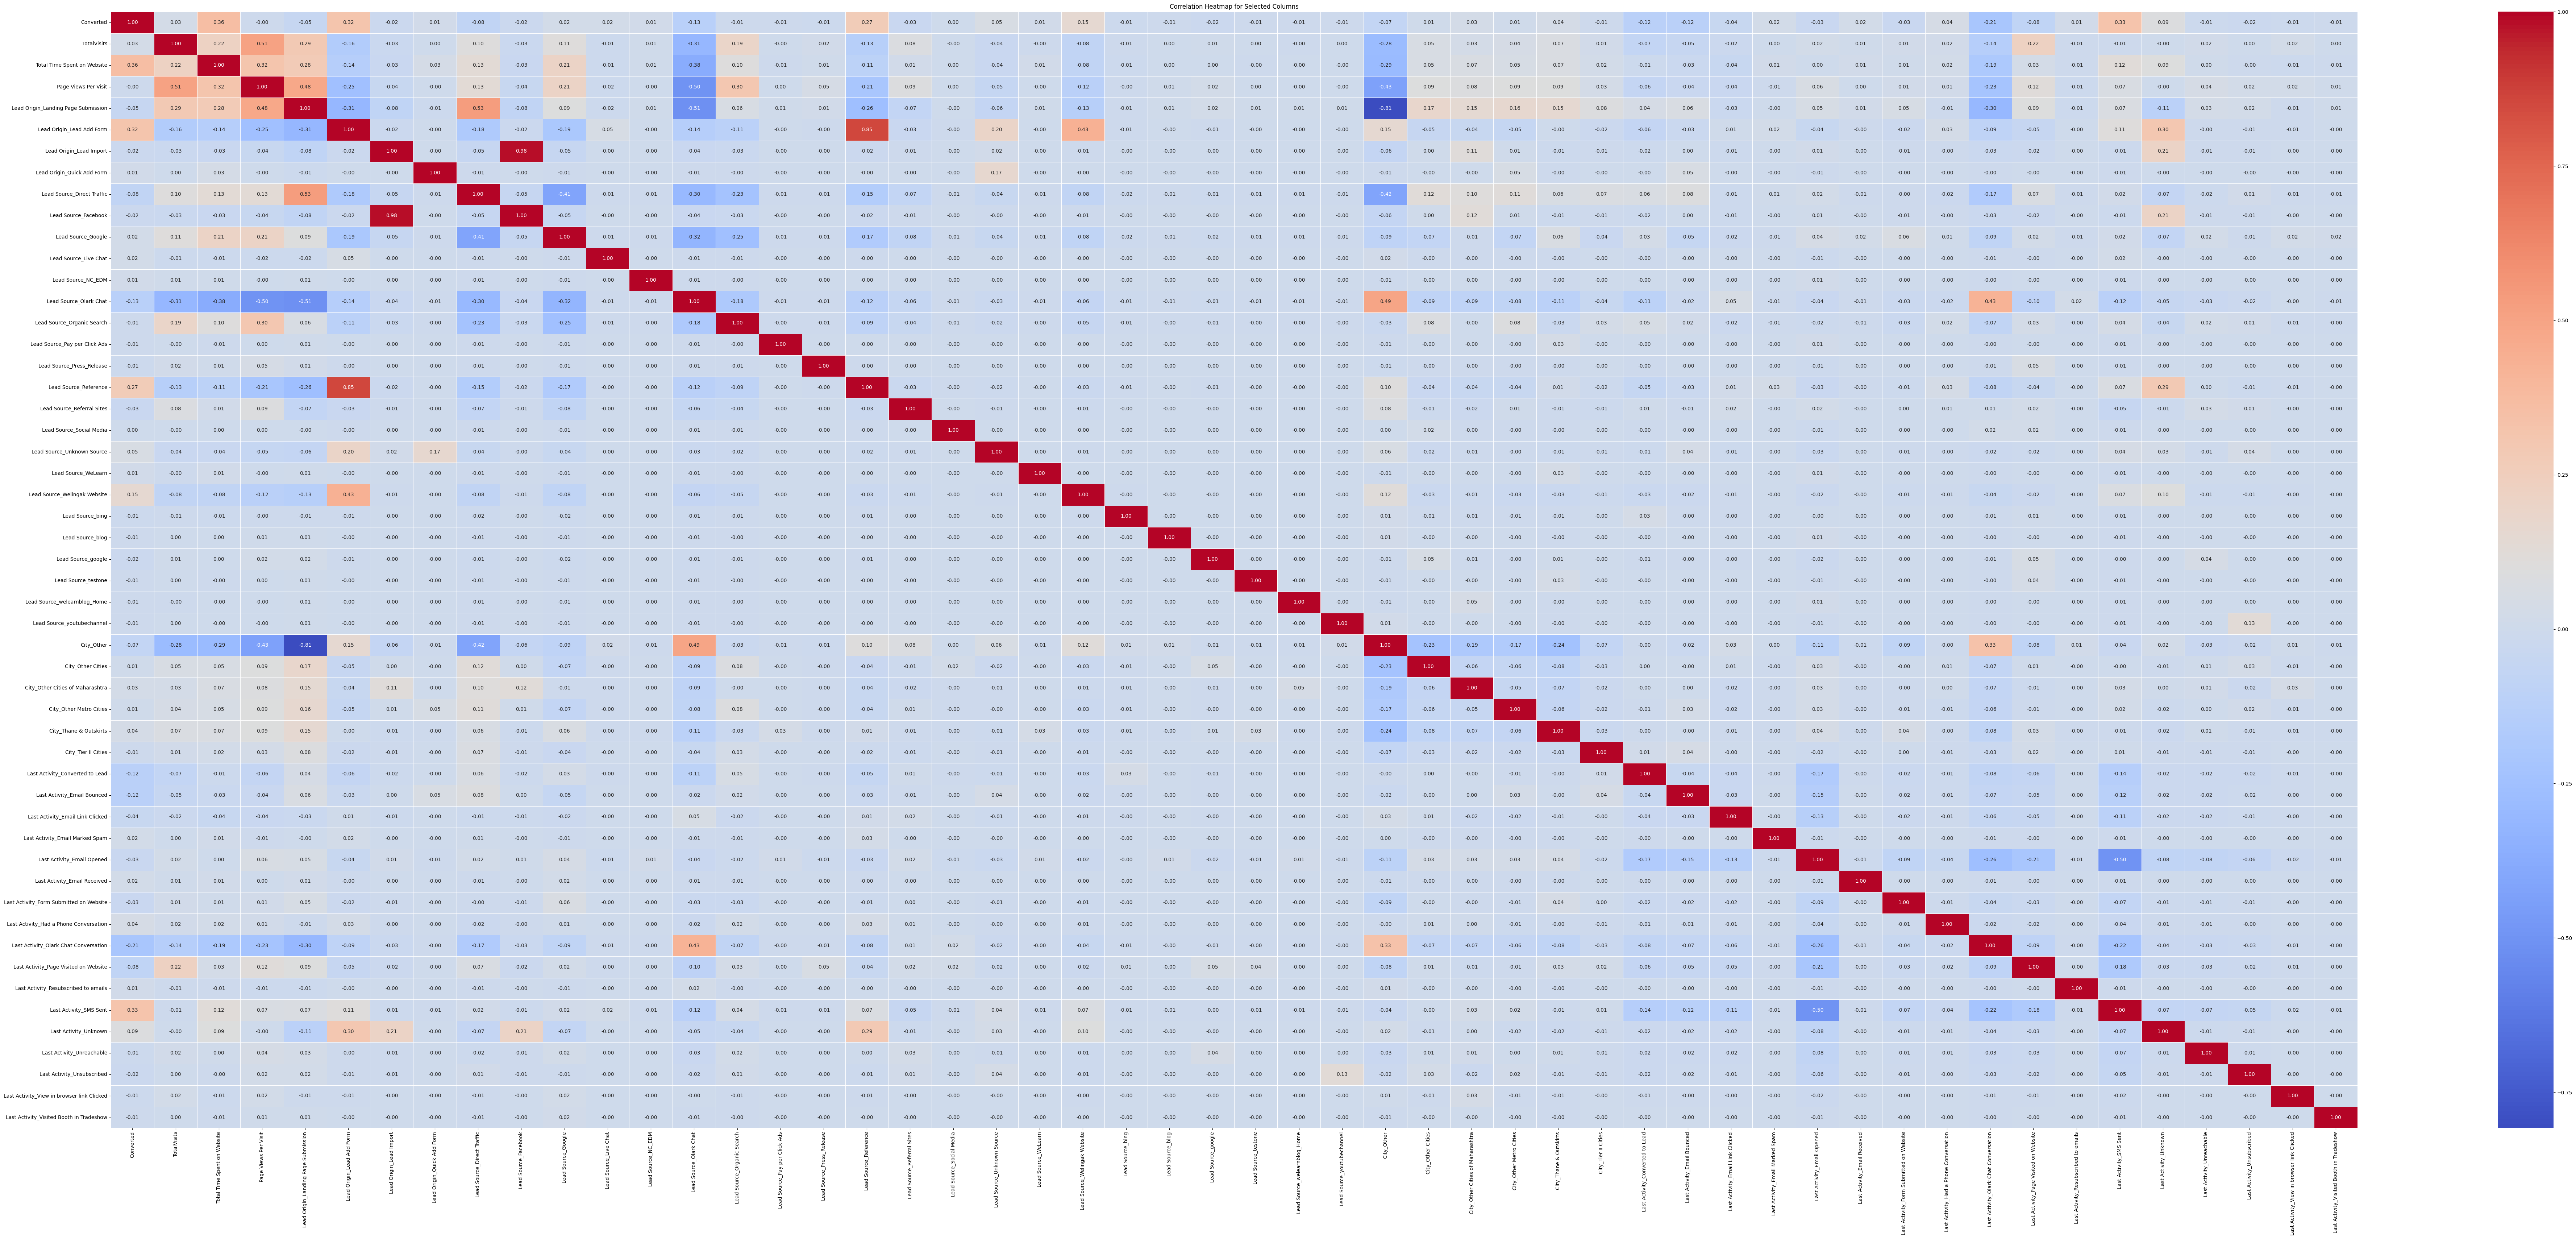

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset
df = pd.read_csv('lead_scoring_cleaned.csv')

# Select relevant columns
columns = ['Lead Origin', 'Lead Source', 'Converted', 'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit', 'City', 'Last Activity']

# One-Hot Encoding for categorical columns
converted_encoded = pd.get_dummies(df[columns], columns=['Lead Origin', 'Lead Source', 'City', 'Last Activity'], drop_first=True)

# Compute correlation
correlation = converted_encoded.corr()

# Plotting the heatmap
plt.figure(figsize=(100, 40))  # Adjust figure size
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap for Selected Columns")
plt.show()

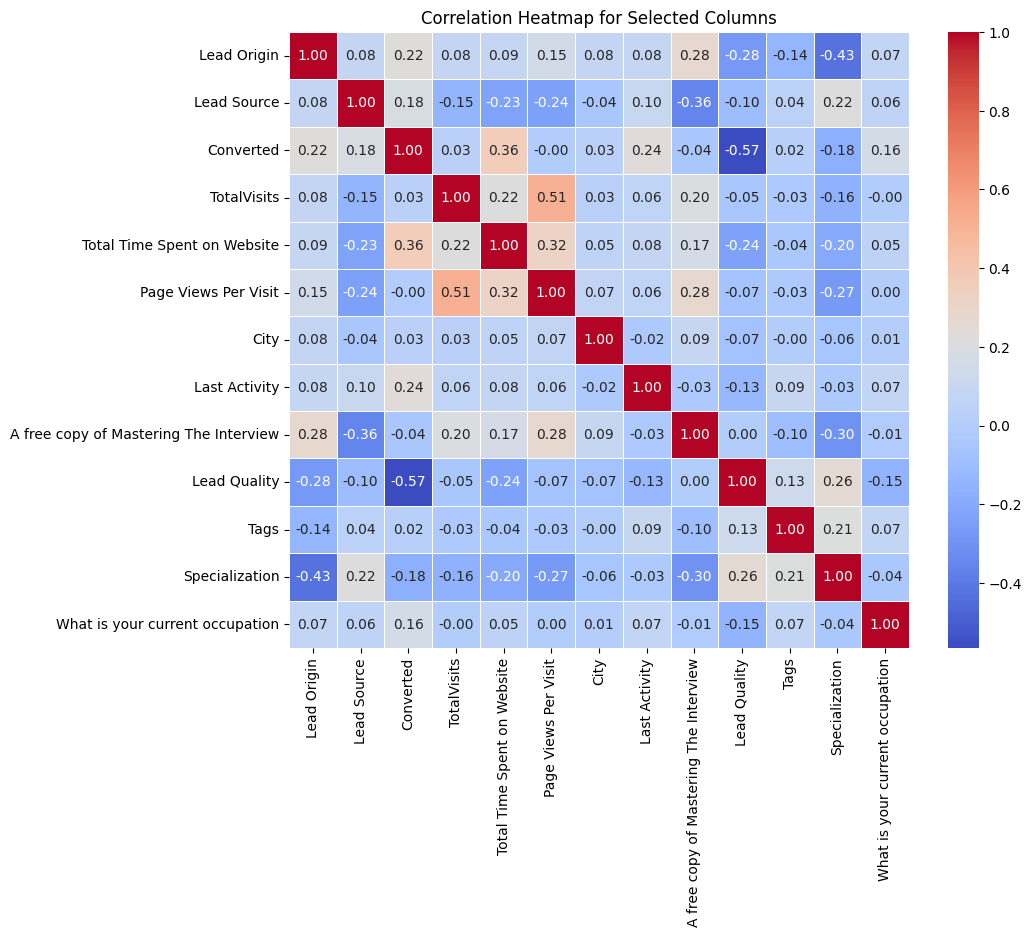

In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset
df = pd.read_csv('lead_scoring_cleaned.csv')

# Select relevant columns
columns = ['Lead Origin', 'Lead Source', 'Converted', 'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit', 'City', 'Last Activity','A free copy of Mastering The Interview','Lead Quality','Tags','Specialization','What is your current occupation']

# Create a copy of the DataFrame for encoding
converted_encoded = df[columns].copy()

# Label Encoding for categorical columns
for col in ['Lead Origin', 'Lead Source', 'City', 'Last Activity','A free copy of Mastering The Interview','Lead Quality','Tags','Specialization','What is your current occupation']:  # Categorical columns
    converted_encoded[col] = converted_encoded[col].astype('category').cat.codes  # Label Encoding

# Compute correlation
correlation = converted_encoded.corr()

# Plotting the heatmap
plt.figure(figsize=(10, 8))  # Adjust figure size
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap for Selected Columns")
plt.show()

In [31]:
import pandas as pd

# Load your dataset
df = pd.read_csv('lead_scoring_cleaned.csv')

# Step 1: One-Hot Encoding for the 'Lead Source' column
df_encoded = pd.get_dummies(df, columns=['Lead Source'], drop_first=True)

# Step 2: Display the first few rows of the new DataFrame
print(df_encoded.head())

                            Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

  Do Not Email Do Not Call  Converted  TotalVisits  \
0           No          No          0          0.0   
1           No          No          0          5.0   
2           No          No          1          2.0   
3           No          No          0          1.0   
4           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  Page Visited on Website   
1                         

In [39]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load your dataset
df = pd.read_csv('lead_scoring_cleaned.csv')

# Step 1: Convert categorical columns to numeric values
df['Lead Source'] = df['Lead Source'].astype('category').cat.codes
# Repeat for other categorical columns as needed
categorical_columns = ['Lead Origin', 'Lead Source', 'City', 'Last Activity']
for col in categorical_columns:
    mapping_df = pd.DataFrame({
        'Category': df[col].astype('category').cat.categories,
        'Encoded Value': df[col].astype('category').cat.codes
    })
    mapping_df.to_excel(f'{col}_mapping.xlsx', index=False)

# Step 2: Select features to standardize
# Assuming you want to standardize the following columns
features_to_standardize = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit', 'Lead Source']

# Step 3: Initialize the StandardScaler
scaler = StandardScaler()

# Step 4: Fit and transform the selected features
df[features_to_standardize] = scaler.fit_transform(df[features_to_standardize])

# Step 5: Display the standardized DataFrame
print(df[features_to_standardize].head())

ValueError: array length 5 does not match index length 9240

In [38]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load your dataset
df = pd.read_csv('lead_scoring_cleaned.csv')

# Step 1: Convert categorical columns to numeric values
categorical_columns = ['Lead Origin', 'Lead Source', 'City', 'Last Activity']
for col in categorical_columns:
    df[col] = df[col].astype('category').cat.codes  # Label Encoding

# Step 2: Create mapping files for categorical columns
for col in categorical_columns:
    mapping_df = pd.DataFrame({
        'Category': df[col].astype('category').cat.categories,
        'Encoded Value': df[col].astype('category').cat.codes
    })
    mapping_df.to_excel(f'{col}_mapping.xlsx', index=False)  # Save mapping to Excel

# Step 3: Select features to standardize
features_to_standardize = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit'] + categorical_columns

# Step 4: Split the data into features and target variable
X = df.drop('Converted', axis=1)  # Features
y = df['Converted']  # Target variable

# Step 5: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Initialize the StandardScaler
scaler = StandardScaler()

# Step 7: Fit and transform the training data
X_train[features_to_standardize] = scaler.fit_transform(X_train[features_to_standardize])

# Step 8: Transform the test data using the same scaler
X_test[features_to_standardize] = scaler.transform(X_test[features_to_standardize])

# Step 9: Train a machine learning model (Logistic Regression)
model = LogisticRegression()
model.fit(X_train, y_train)

# Step 10: Make predictions on the test set
y_pred = model.predict(X_test)

# Step 11: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Step 12: Print evaluation results
print(f'Accuracy: {accuracy:.2f}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

ValueError: array length 5 does not match index length 9240

In [40]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load your dataset
df = pd.read_csv('lead_scoring_cleaned.csv')

# Step 1: Convert categorical columns to numeric values
categorical_columns = ['Lead Origin', 'Lead Source', 'City', 'Last Activity']
mapping_files = {}  # Dictionary to hold mapping DataFrames for each categorical column

for col in categorical_columns:
    df[col] = df[col].astype('category')  # Convert to categorical type
    # Create a mapping DataFrame
    mapping_df = pd.DataFrame({
        'Category': df[col].cat.categories,
        'Encoded Value': range(len(df[col].cat.categories))  # Create a range for encoded values
    })
    mapping_files[col] = mapping_df  # Store the mapping DataFrame
    df[col] = df[col].cat.codes  # Label Encoding

# Step 2: Select features to standardize
features_to_standardize = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit'] + categorical_columns

# Step 3: Split the data into features and target variable
X = df.drop('Converted', axis=1)  # Features
y = df['Converted']  # Target variable

# Step 4: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Initialize the StandardScaler
scaler = StandardScaler()

# Step 6: Fit and transform the training data
X_train[features_to_standardize] = scaler.fit_transform(X_train[features_to_standardize])

# Step 7: Transform the test data using the same scaler
X_test[features_to_standardize] = scaler.transform(X_test[features_to_standardize])

# Step 8: Add standardized values to the mapping DataFrames
for col in categorical_columns:
    # Add a new column for standardized values
    mapping_files[col]['Standardized Value'] = mapping_files[col]['Encoded Value'].apply(lambda x: scaler.transform([[x]])[0][0])

    # Save the mapping to an Excel file
    mapping_files[col].to_excel(f'{col}_mapping.xlsx', index=False)  # Save mapping to Excel

# Step 9: Train a machine learning model (Logistic Regression)
model = LogisticRegression()
model.fit(X_train, y_train)

# Step 10: Make predictions on the test set
y_pred = model.predict(X_test)

# Step 11: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Step 12: Print evaluation results
print(f'Accuracy: {accuracy:.2f}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

c:\Users\SrimathiP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


ValueError: X has 1 features, but StandardScaler is expecting 7 features as input.

C:\Users\SrimathiP\AppData\Local\Temp\ipykernel_19092\4259478400.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=lead_source_counts.index, y=lead_source_counts.values, palette="viridis")


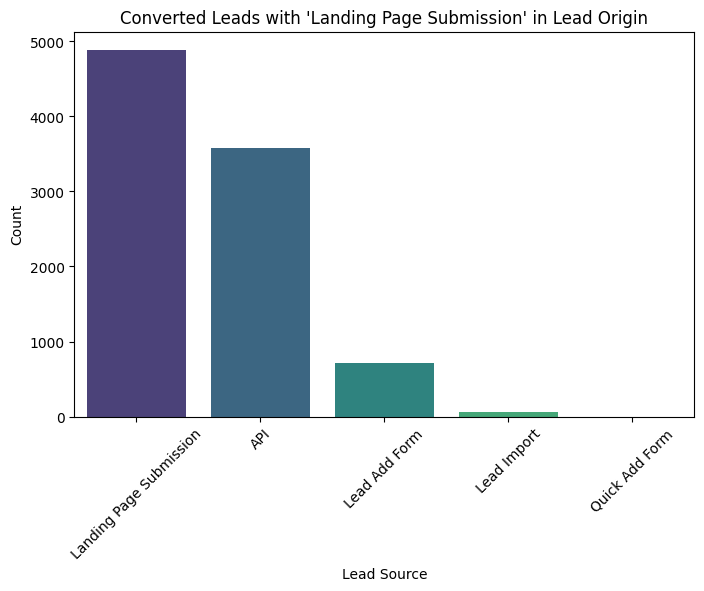

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Filter data where 'Converted' is 1 and 'Lead Origin' is 'Landing Page Submission'
# filtered_df = df[(df['Converted'] == 1) & (df['Lead Origin'] == 'Landing Page Submission')]
filtered_df = df
# Count occurrences of 'Lead Source' for these leads
lead_source_counts = filtered_df['Lead Origin'].value_counts()

# Plot bar graph
plt.figure(figsize=(8, 5))
sns.barplot(x=lead_source_counts.index, y=lead_source_counts.values, palette="viridis")
plt.xlabel("Lead Source")
plt.ylabel("Count")
plt.title("Converted Leads with 'Landing Page Submission' in Lead Origin")
plt.xticks(rotation=45)  # Rotate labels for better readability
plt.show()


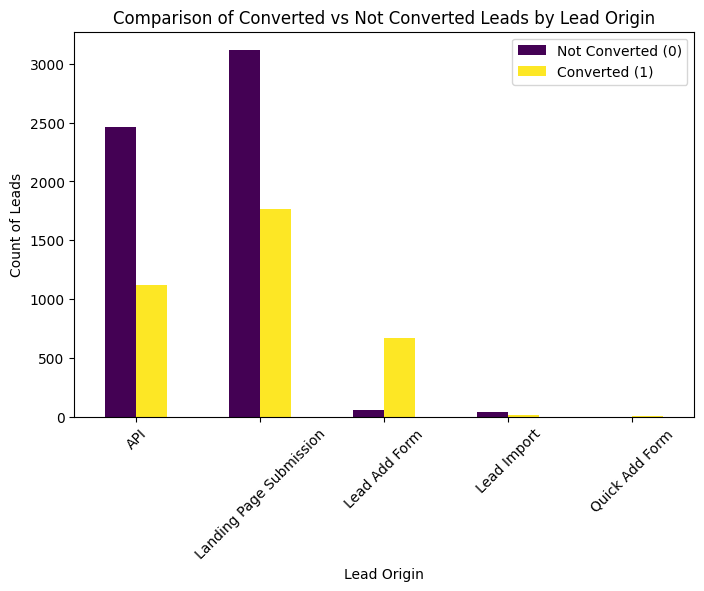

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Count occurrences of 'Converted' (0 and 1) for each 'Lead Origin'
conversion_counts = df.groupby(['Lead Origin', 'Converted']).size().unstack()

# Plot the grouped bar chart
conversion_counts.plot(kind='bar', figsize=(8, 5), colormap="viridis")

plt.xlabel("Lead Origin")
plt.ylabel("Count of Leads")
plt.title("Comparison of Converted vs Not Converted Leads by Lead Origin")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(["Not Converted (0)", "Converted (1)"])  # Label the bars
plt.show()


In [ ]:
filtered_df = df[df['Asymmetric_Profile_Index'].notna()]

# Step 2: Separate converted and non-converted leads
converted = filtered_df[filtered_df['Converted'] == 1]
non_converted = filtered_df[filtered_df['Converted'] == 0]

# Step 3: Calculate mean values for comparison
mean_converted = converted['Asymmetric_Profile_Index'].mean()
mean_non_converted = non_converted['Asymmetric_Profile_Index'].mean()

# Step 4: Display results
print("Mean Asymmetric Profile Index for Converted Leads:", mean_converted)
print("Mean Asymmetric Profile Index for Non-Converted Leads:", mean_non_converted)

# Step 5: Create a bar plot for visual comparison
labels = ['Converted', 'Non-Converted']
means = [mean_converted, mean_non_converted]

plt.bar(labels, means, color=['blue', 'orange'])
plt.ylabel('Mean Asymmetric Profile Index')
plt.title('Comparison of Asymmetric Profile Index: Converted vs Non-Converted')
plt.show()

In [15]:
df.nunique()


Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        22
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        42
Total Time Spent on Website                      1731
Page Views Per Visit                              115
Last Activity                                      18
Country                                            39
Specialization                                     20
How did you hear about X Education                 10
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article           

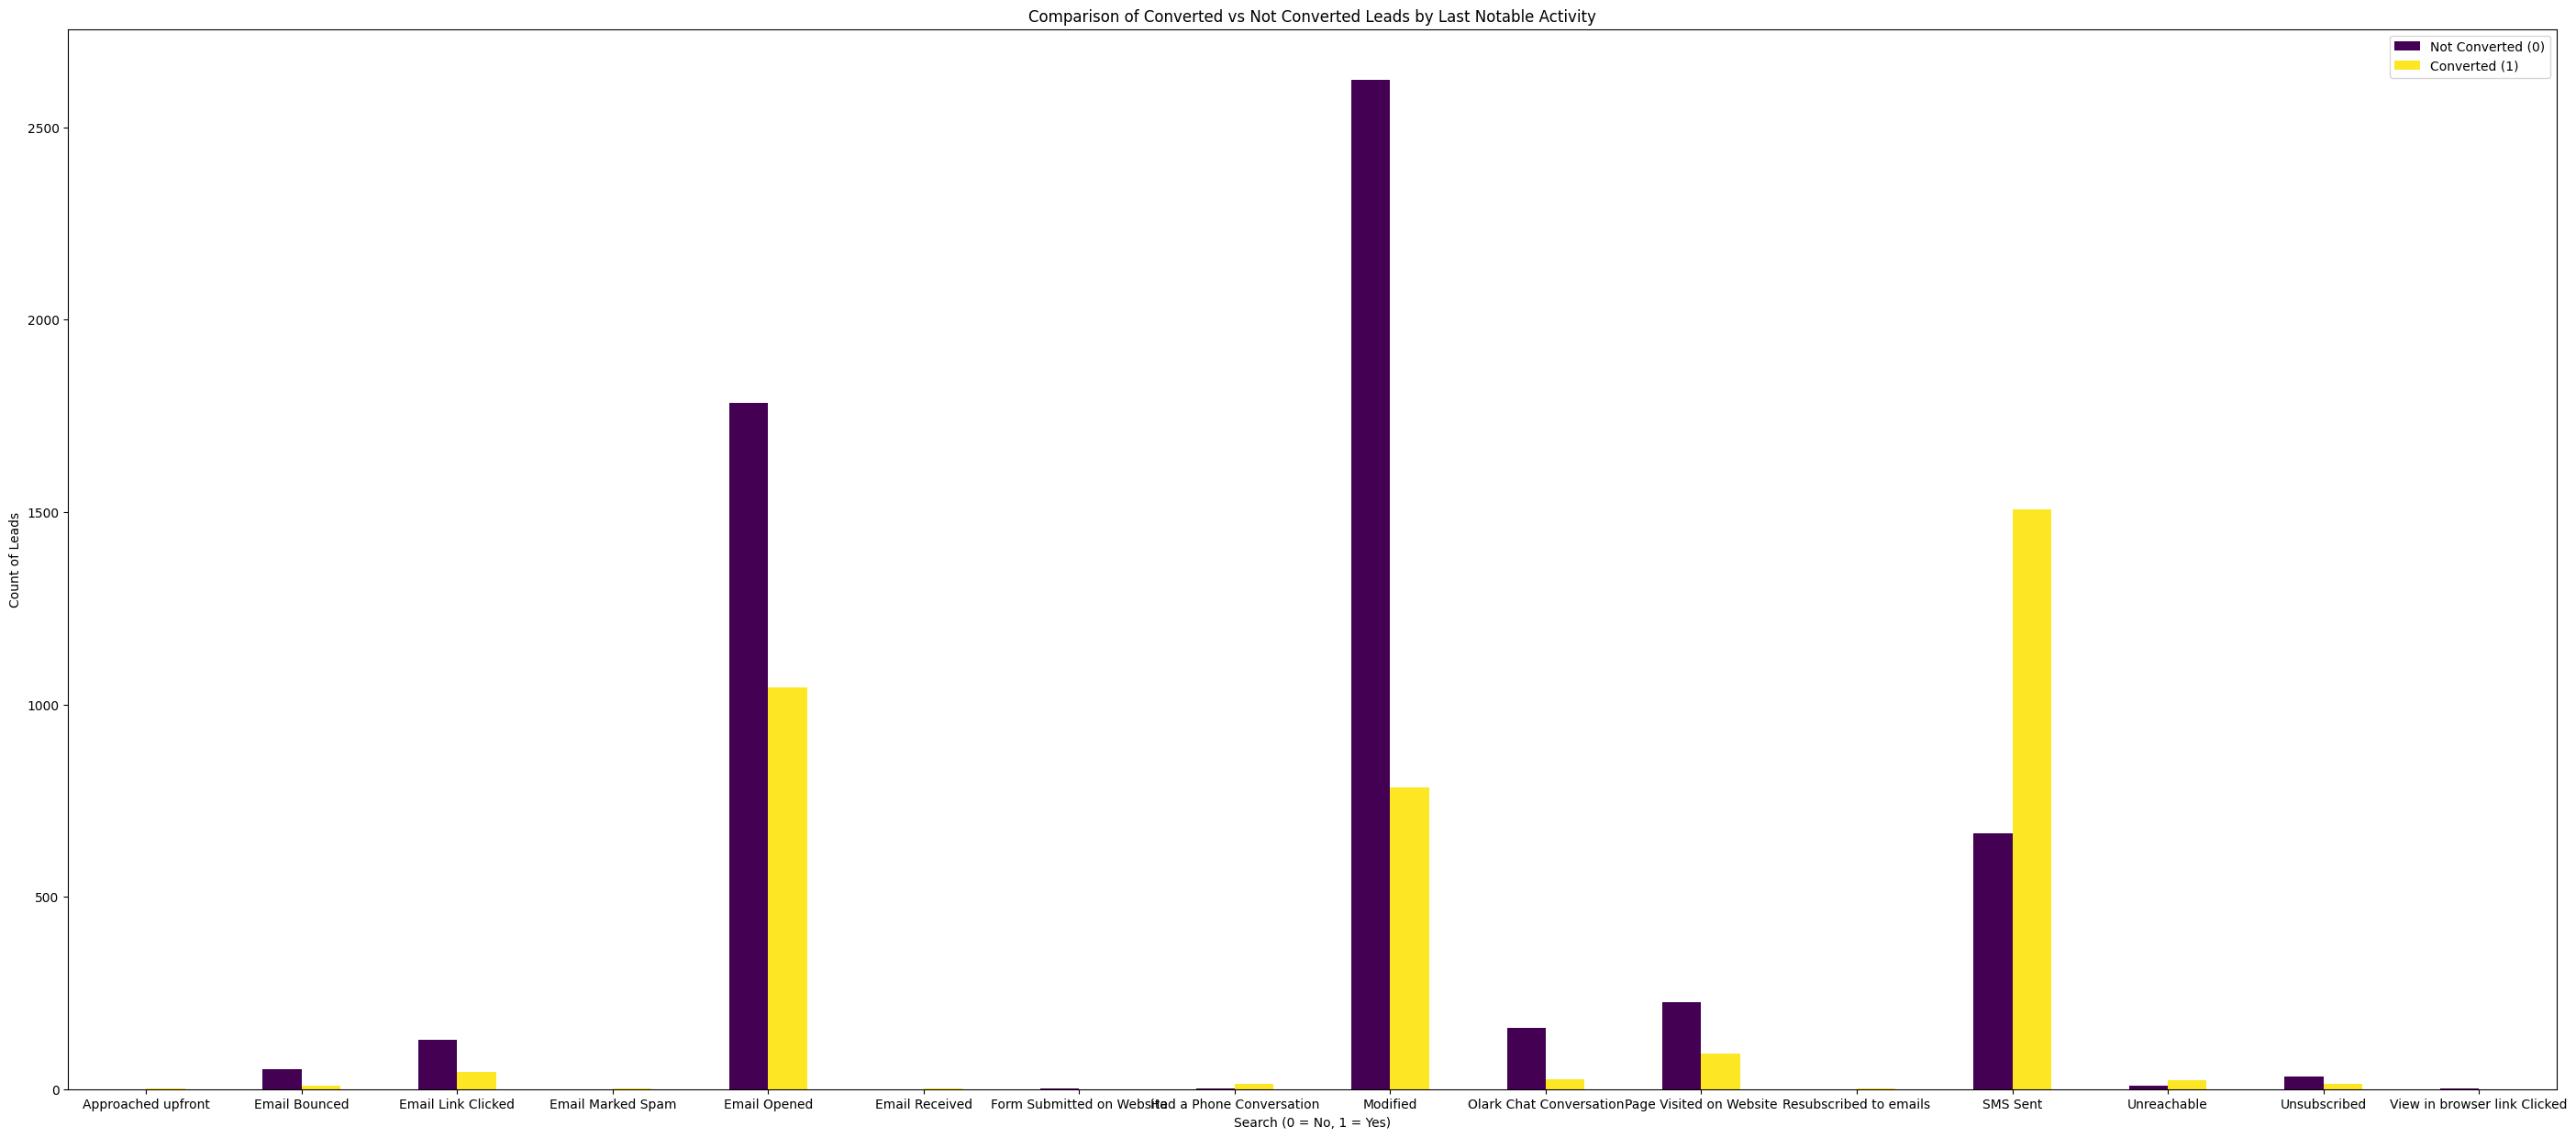

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Count occurrences of 'Converted' (0 and 1) for each 'Search' value
counts = df.groupby(['Last Notable Activity', 'Converted']).size().unstack()

# Plot the grouped bar chart
counts.plot(kind='bar', figsize=(35, 15), colormap="viridis")

plt.xlabel("Search (0 = No, 1 = Yes)")
plt.ylabel("Count of Leads")
plt.title("Comparison of Converted vs Not Converted Leads by Last Notable Activity")
plt.xticks(rotation=0)  # Keep x-axis labels readable
plt.legend(["Not Converted (0)", "Converted (1)"])  # Label the bars
plt.show()

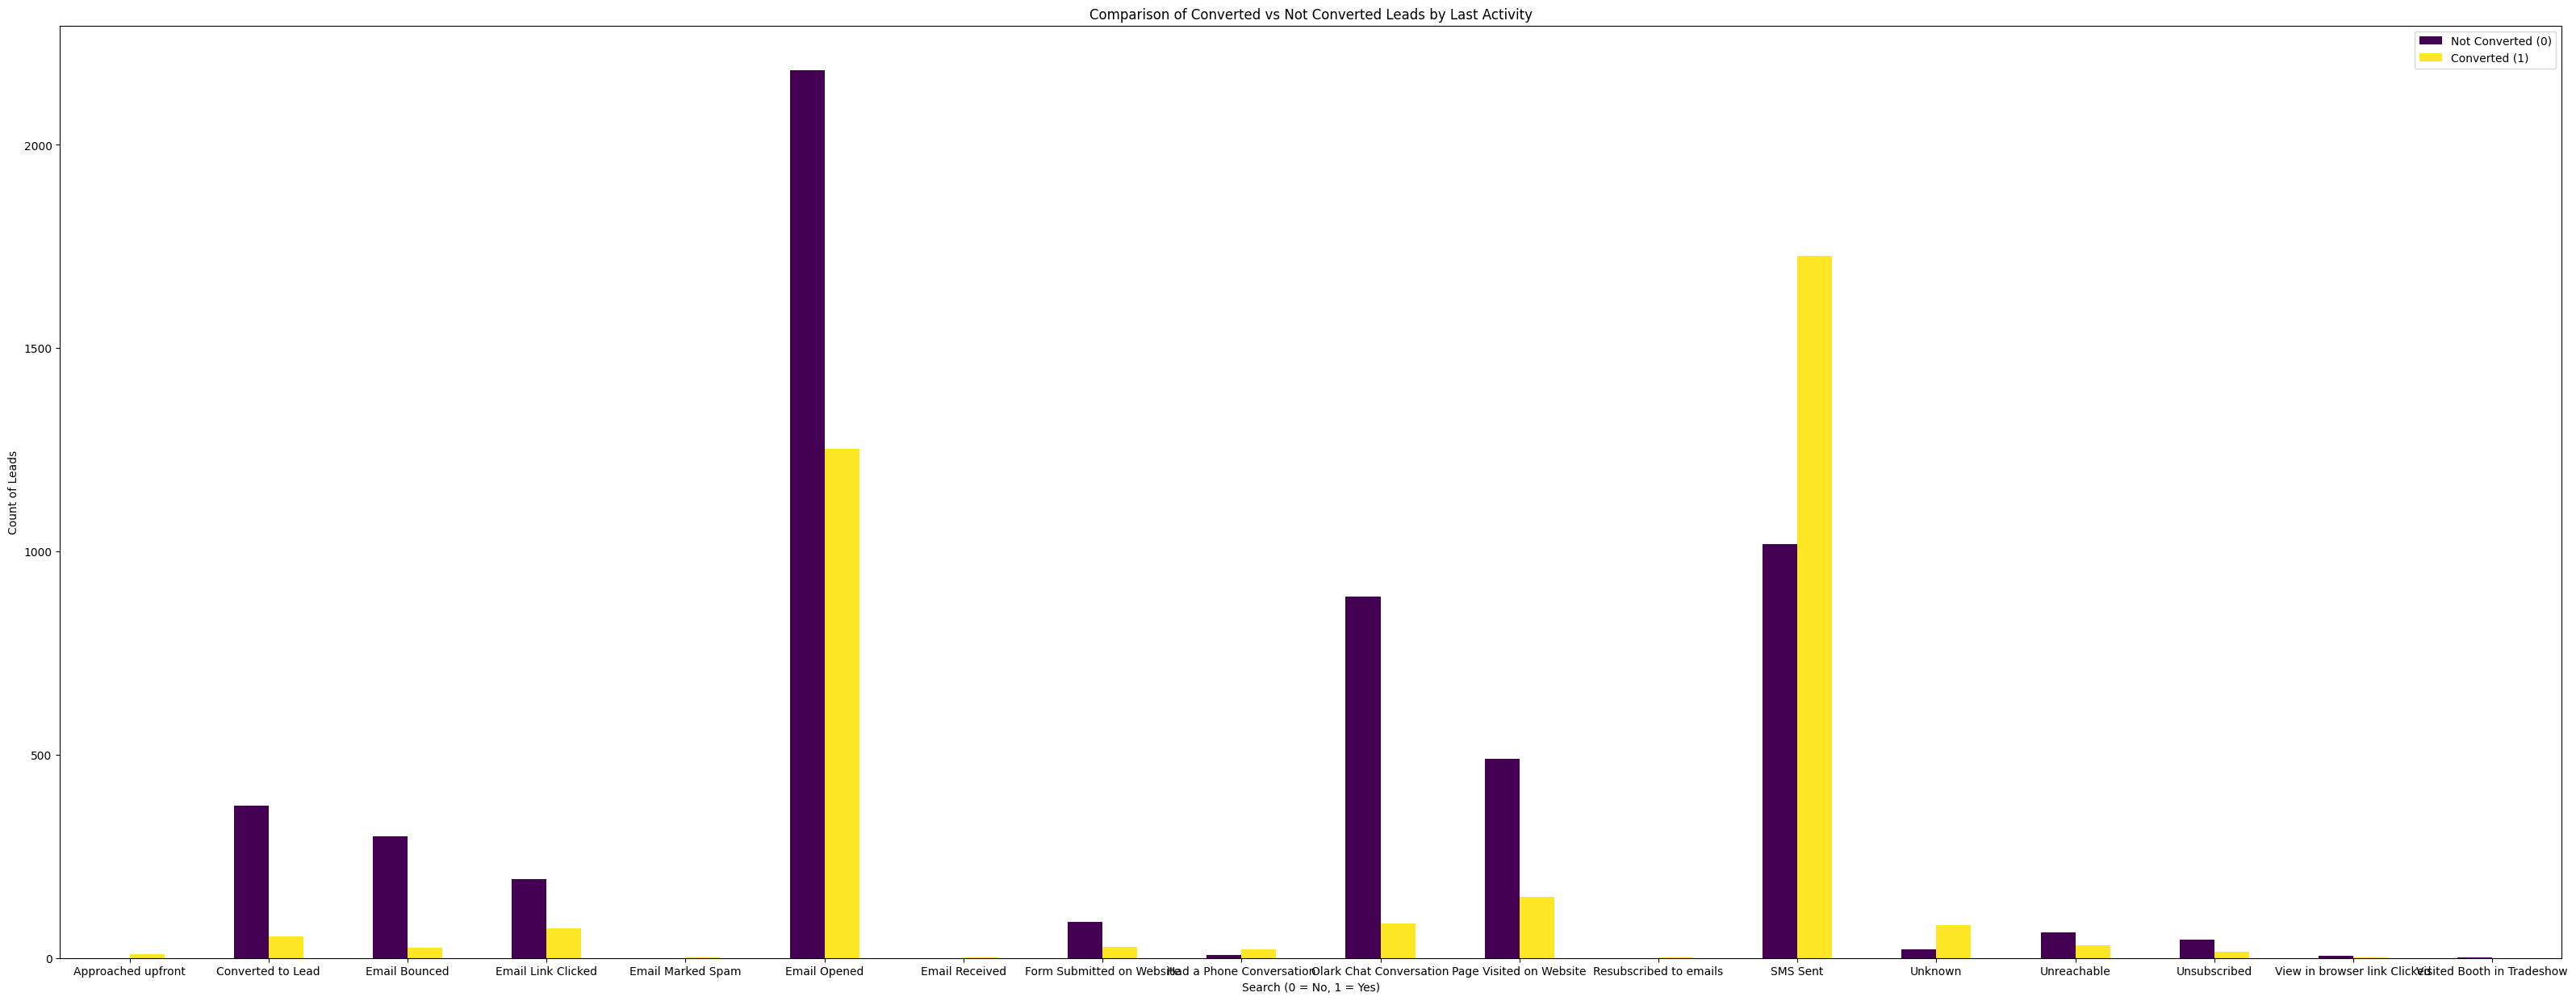

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Count occurrences of 'Converted' (0 and 1) for each 'Search' value
counts = df.groupby(['Last Activity', 'Converted']).size().unstack()

# Plot the grouped bar chart
counts.plot(kind='bar', figsize=(40, 15), colormap="viridis")

plt.xlabel("Search (0 = No, 1 = Yes)")
plt.ylabel("Count of Leads")
plt.title("Comparison of Converted vs Not Converted Leads by Last Activity")
plt.xticks(rotation=0)  # Keep x-axis labels readable
plt.legend(["Not Converted (0)", "Converted (1)"])  # Label the bars
plt.show()

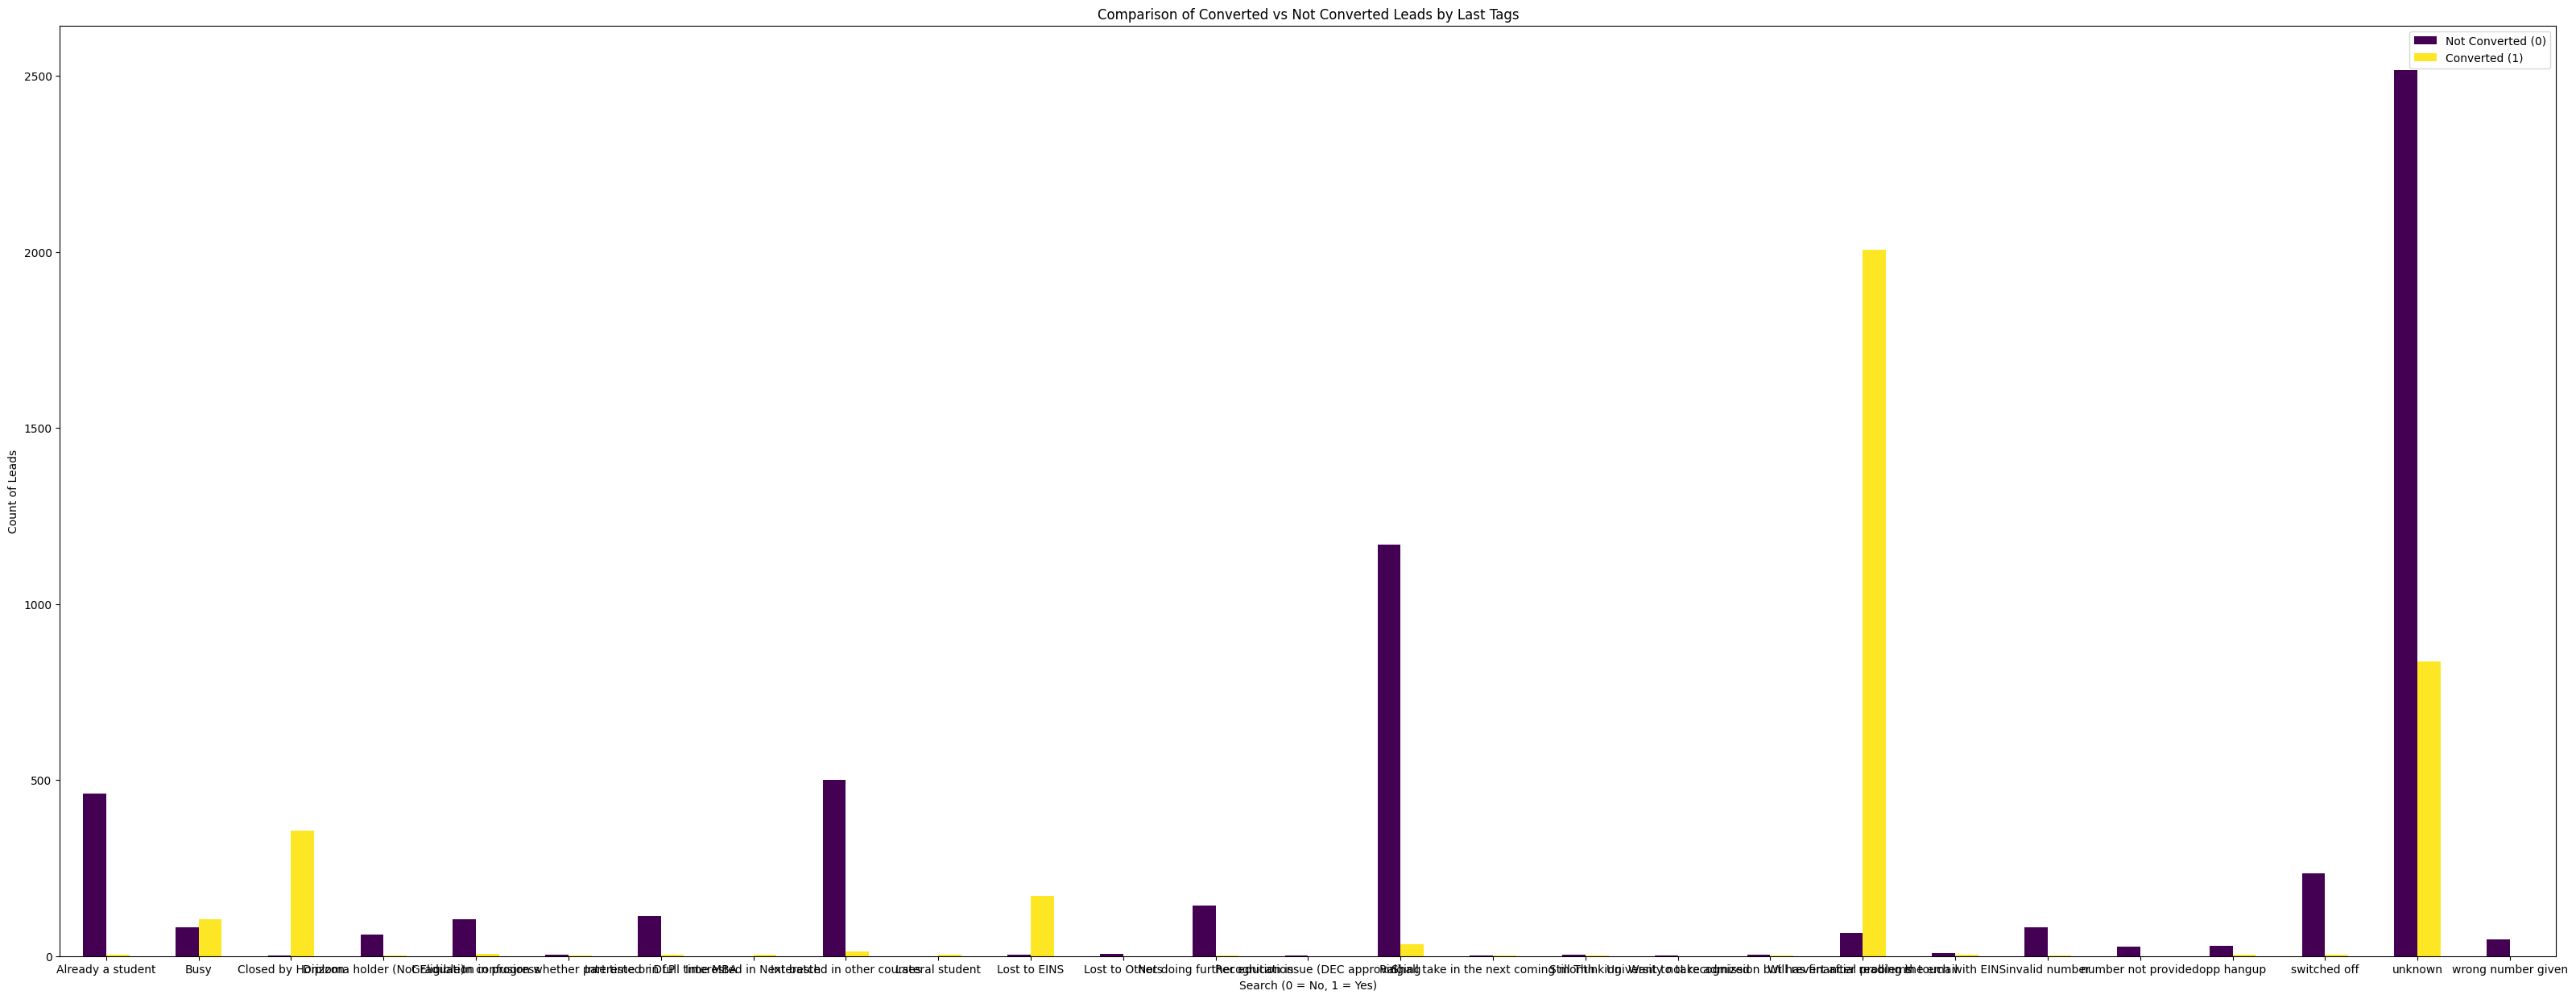

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Count occurrences of 'Converted' (0 and 1) for each 'Search' value
counts = df.groupby(['Tags', 'Converted']).size().unstack()

# Plot the grouped bar chart
counts.plot(kind='bar', figsize=(40, 15), colormap="viridis")

plt.xlabel("Search (0 = No, 1 = Yes)")
plt.ylabel("Count of Leads")
plt.title("Comparison of Converted vs Not Converted Leads by Last Tags")
plt.xticks(rotation=0)  # Keep x-axis labels readable
plt.legend(["Not Converted (0)", "Converted (1)"])  # Label the bars
plt.show()

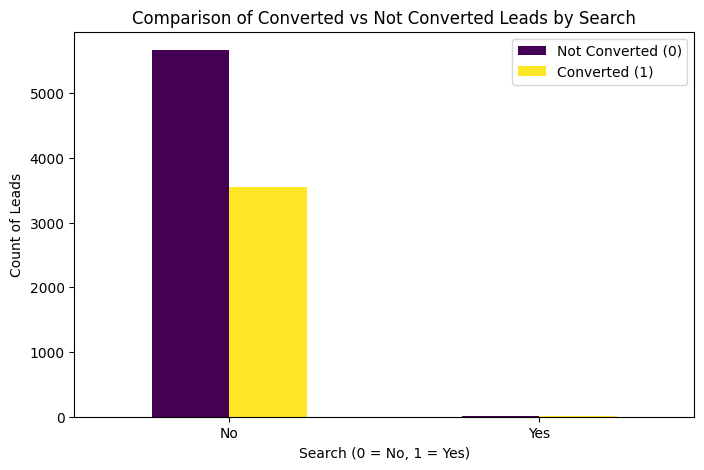

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Count occurrences of 'Converted' (0 and 1) for each 'Search' value
search_conversion_counts = df.groupby(['Search', 'Converted']).size().unstack()

# Plot the grouped bar chart
search_conversion_counts.plot(kind='bar', figsize=(8, 5), colormap="viridis")

plt.xlabel("Search (0 = No, 1 = Yes)")
plt.ylabel("Count of Leads")
plt.title("Comparison of Converted vs Not Converted Leads by Search")
plt.xticks(rotation=0)  # Keep x-axis labels readable
plt.legend(["Not Converted (0)", "Converted (1)"])  # Label the bars
plt.show()


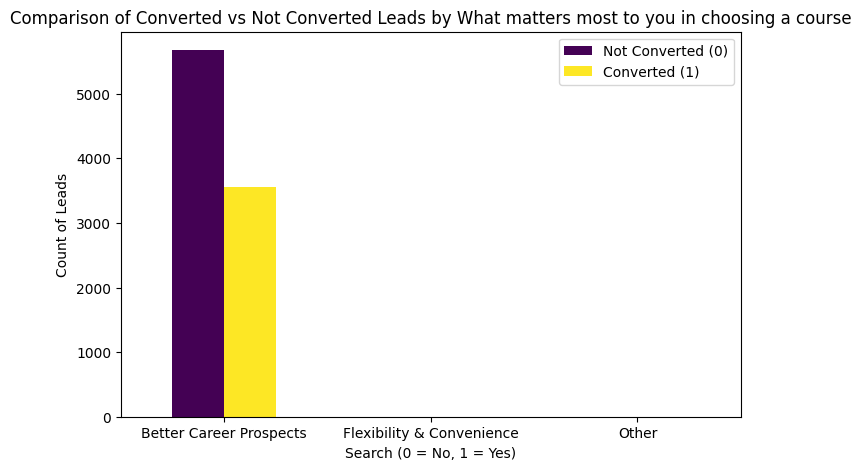

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Count occurrences of 'Converted' (0 and 1) for each 'Search' value
counts = df.groupby(['What matters most to you in choosing a course', 'Converted']).size().unstack()

# Plot the grouped bar chart
counts.plot(kind='bar', figsize=(8, 5), colormap="viridis")

plt.xlabel("Search (0 = No, 1 = Yes)")
plt.ylabel("Count of Leads")
plt.title("Comparison of Converted vs Not Converted Leads by What matters most to you in choosing a course")
plt.xticks(rotation=0)  # Keep x-axis labels readable
plt.legend(["Not Converted (0)", "Converted (1)"])  # Label the bars
plt.show()
